In [17]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


Intersection point on the orientation line: (np.float64(1.0105831181686475), np.float64(0.97168671331798))
Alpha value corresponding to the intersection: 1.058495873235578


<Figure size 1000x800 with 0 Axes>

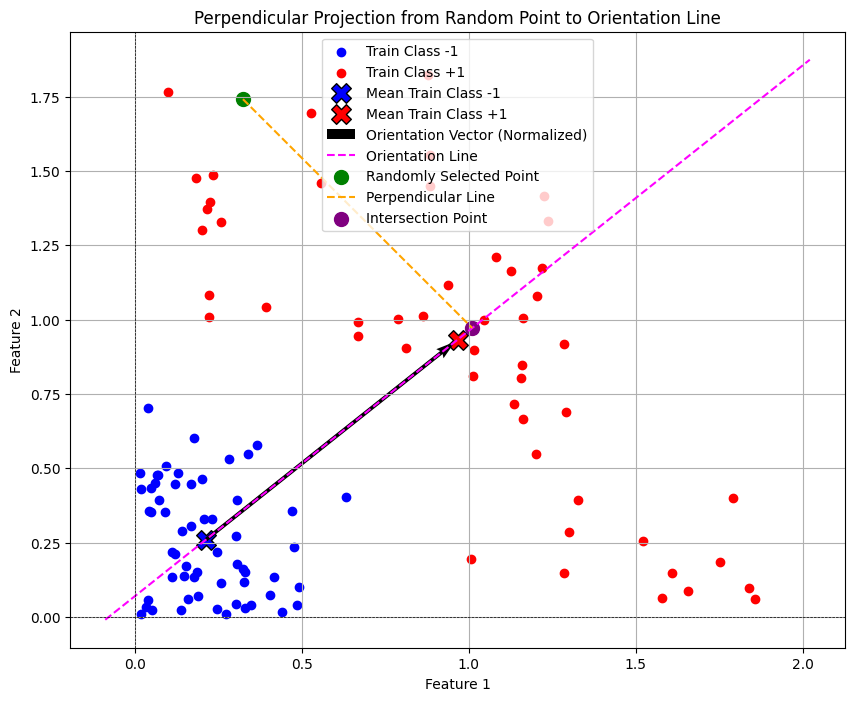

In [12]:
'''
### 1 ---- IMPORT THE DATA AND PLOT

import numpy as np
import matplotlib.pyplot as plt

# Load the training data
train_data = np.loadtxt("adaboost-train-24.txt")
X_train = train_data[:, :-1]  # Features
y_train = train_data[:, -1]   # Labels

# Load the testing data
test_data = np.loadtxt("adaboost-test-24.txt")
X_test = test_data[:, :-1]  # Features
y_test = test_data[:, -1]   # Labels



# Set figure size
plt.figure(figsize=(8, 6))  # Adjust width and height as desired

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, label='Training Data')

# Plot the testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', label='Testing Data')
### 1/---
'''

### --- 2.0 RE-STARTING >> WEAK LINEAR CLASSIFIER --- ###


import numpy as np
import matplotlib.pyplot as plt
import random

# Load the data from the text files
# Each row contains two features (x, y) and a label (+1 or -1)
# test_data = np.loadtxt('adaboost-test-24.txt')
# train_data = np.loadtxt('adaboost-train-24.txt')
test_data = np.loadtxt('tmp_POS_adaboost-test-24.txt')
train_data = np.loadtxt('tmp_POS_adaboost-train-24.txt')


# Separate the data into features (x, y) and labels
x_test, y_test, labels_test = test_data[:, 0], test_data[:, 1], test_data[:, 2]
x_train, y_train, labels_train = train_data[:, 0], train_data[:, 1], train_data[:, 2]

# Function to calculate the mean points for the two classes (-1 and +1)
def calculate_class_means(x, y, labels):
    """
    Calculate the mean coordinates for the two classes (-1 and +1).
    This implements the equations:
      μ_-1 = (Σ (x_i, y_i) for all -1 labels) / m_-ve
      μ_+1 = (Σ (x_i, y_i) for all +1 labels) / m_+ve
    Where:
      - m_-ve = Total number of -1 labels
      - m_+ve = Total number of +1 labels
    """
    # Mask for selecting only -1 class data points
    class_minus_1_mask = labels == -1
    # Mask for selecting only +1 class data points
    class_plus_1_mask = labels == 1

    # Select x and y for class -1
    x_minus_1 = x[class_minus_1_mask]
    y_minus_1 = y[class_minus_1_mask]

    # Select x and y for class +1
    x_plus_1 = x[class_plus_1_mask]
    y_plus_1 = y[class_plus_1_mask]

    # Calculate mean for class -1 (μ_-1) *** SEE NOTES A001
    mean_minus_1 = (np.mean(x_minus_1), np.mean(y_minus_1))

    # Calculate mean for class +1 (μ_+1) *** SEE NOTES A001
    mean_plus_1 = (np.mean(x_plus_1), np.mean(y_plus_1))

    return mean_minus_1, mean_plus_1

# Calculate mean points for test data
mean_test_minus_1, mean_test_plus_1 = calculate_class_means(x_test, y_test, labels_test)
# Calculate mean points for train data
mean_train_minus_1, mean_train_plus_1 = calculate_class_means(x_train, y_train, labels_train)

# Plotting the data points and mean points
plt.figure(figsize=(10, 8))

## ***** I've commented out the text data set - I just want to focus on the training data *****
# Plot the test data points for class -1 in blue
## ***** plt.scatter(x_test[labels_test == -1], y_test[labels_test == -1], color='blue', label='Test Class -1')
# Plot the test data points for class +1 in red
## ***** plt.scatter(x_test[labels_test == 1], y_test[labels_test == 1], color='red', label='Test Class +1')

# Plot the train data points for class -1 in cyan
# plt.scatter(x_train[labels_train == -1], y_train[labels_train == -1], color='navy', label='Train Class -1', alpha=0.5)
# Plot the train data points for class +1 in orange
# plt.scatter(x_train[labels_train == 1], y_train[labels_train == 1], color='tomato', label='Train Class +1', alpha=0.5)


## ***** I've commented out the text data set - I just want to focus on the training data *****
# Add the calculated mean points to the plot
# Mean of test class -1 (blue X)
## ***** plt.scatter(*mean_test_minus_1, color='blue', edgecolor='black', marker='X', s=200, label='Mean Test Class -1')
# Mean of test class +1 (red X)
## *****  plt.scatter(*mean_test_plus_1, color='red', edgecolor='black', marker='X', s=200, label='Mean Test Class +1')
# Mean of train class -1 (cyan diamond)
# plt.scatter(*mean_train_minus_1, color='navy', edgecolor='black', marker='D', s=200, label='Mean Train Class -1')
# Mean of train class +1 (orange diamond)
# plt.scatter(*mean_train_plus_1, color='tomato', edgecolor='black', marker='D', s=200, label='Mean Train Class +1')





## ********************************************************* *** SEE NOTES A002
## ***** adding the normalised orientation vector
# Step 1: Calculate the orientation vector r using training data means
r_train = (mean_train_plus_1[0] - mean_train_minus_1[0], mean_train_plus_1[1] - mean_train_minus_1[1])

# Step 2: Normalize the orientation vector n
magnitude_r_train = np.sqrt(r_train[0]**2 + r_train[1]**2)
n_train = (r_train[0] / magnitude_r_train, r_train[1] / magnitude_r_train)

# Step 3: Plot the training data with the normalized orientation vector
plt.figure(figsize=(10, 8))

# Scatter plot of training data
# Plot the training data points for class -1 in blue
plt.scatter(x_train[labels_train == -1], y_train[labels_train == -1], color='blue', label='Train Class -1')
# Plot the training data points for class +1 in red
plt.scatter(x_train[labels_train == 1], y_train[labels_train == 1], color='red', label='Train Class +1')

# Mark the means
plt.scatter(*mean_train_minus_1, color='blue', edgecolor='black', marker='X', s=200, label='Mean Train Class -1')
plt.scatter(*mean_train_plus_1, color='red', edgecolor='black', marker='X', s=200, label='Mean Train Class +1')

# Add the normalized orientation vector to the plot
# Plot the normalized orientation vector
plt.quiver(mean_train_minus_1[0], mean_train_minus_1[1],
           n_train[0], n_train[1],
           angles='xy', scale_units='xy', scale=1, color='black', width=0.005, label='Orientation Vector (Normalized)')
## *********************************************************








## ********************************************************* *** SEE NOTES A003
## ***** adding the orientation line A003 -- adding the orientation line
# Step 1: Define a range of alpha values for the orientation line
alpha_values = np.linspace(-0.4, 2.4, 500)  # Use a range to extend the line in both directions

#A003 -- adding the orientation line
# Step 2: Calculate the points on the orientation line using p = μ_-1 + αr
line_points_x = mean_train_minus_1[0] + alpha_values * r_train[0]
line_points_y = mean_train_minus_1[1] + alpha_values * r_train[1]
'''
# Step 3: Add the orientation line to the plot
plt.figure(figsize=(10, 8))

# Scatter plot of training data
plt.scatter(x_train[labels_train == -1], y_train[labels_train == -1], color='blue', label='Train Class -1')
plt.scatter(x_train[labels_train == 1], y_train[labels_train == 1], color='red', label='Train Class +1')

# Mark the means
plt.scatter(*mean_train_minus_1, color='blue', edgecolor='black', marker='X', s=200, label='Mean Train Class -1')
plt.scatter(*mean_train_plus_1, color='red', edgecolor='black', marker='X', s=200, label='Mean Train Class +1')

# Plot the normalized orientation vector
plt.quiver(mean_train_minus_1[0], mean_train_minus_1[1],
           n_train[0], n_train[1],
           angles='xy', scale_units='xy', scale=1, color='black', width=0.005, label='Orientation Vector (Normalized)')
'''
# Plot the orientation line -- A003 -- adding the orientation line
plt.plot(line_points_x, line_points_y, color='magenta', linestyle='--', label='Orientation Line')


## *********************************************************



## ********************************************************* *** SEE NOTES A004
## ***** projecting a single point on to our orientation line
# Step 1: Randomly select a point from the training data
random_idx = random.randint(0, len(x_train) - 1)  # Random index
random_point = (x_train[random_idx], y_train[random_idx])

# Step 2: Calculate the perpendicular projection
# Let random_point = (x, y)
x, y = random_point

# Calculate alpha for the projection onto the orientation line
# Alpha is derived from minimizing the perpendicular distance
alpha_perpendicular = ((x - mean_train_minus_1[0]) * r_train[0] +
                       (y - mean_train_minus_1[1]) * r_train[1]) / (r_train[0]**2 + r_train[1]**2)

# Calculate the intersection point on the orientation line
intersection_point = (mean_train_minus_1[0] + alpha_perpendicular * r_train[0],
                      mean_train_minus_1[1] + alpha_perpendicular * r_train[1])

# Plot the randomly selected point
plt.scatter(*random_point, color='green', s=100, label='Randomly Selected Point')

# Plot the perpendicular line
plt.plot([random_point[0], intersection_point[0]],
         [random_point[1], intersection_point[1]],
         color='orange', linestyle='--', label='Perpendicular Line')

# Mark the intersection point
plt.scatter(*intersection_point, color='purple', s=100, label='Intersection Point')

# Step 4: Output the intersection point
print(f"Intersection point on the orientation line: {intersection_point}")
print(f"Alpha value corresponding to the intersection: {alpha_perpendicular}")

## A004/ *********************************************************




# Add grid, axis labels, and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# *** plt.title('Class Distribution and Mean Points')
plt.title('Perpendicular Projection from Random Point to Orientation Line')
# Add horizontal and vertical lines at 0 for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()


[Data Check] Training Data Sample:
[[-0.682  0.282]
 [-1.521  1.166]
 [ 0.458 -0.261]
 [-0.781  1.355]
 [ 0.245  0.028]] [-1.  1. -1.  1. -1.]
[Data Check] Training Labels Distribution: (array([-1.,  1.]), array([200, 200]))
[Data Check] Testing Labels Distribution: (array([-1.,  1.]), array([600, 600]))
[Weak Learner] Class -1 Mean: [-0.008675 -0.01129 ], Class +1 Mean: [ 0.08295  -0.001045]
[Weak Learner] Direction Vector: [0.091625 0.010245]
[AdaBoost] Weak Learner 1 skipped due to high error rate: 0.5150
[Weak Learner] Class -1 Mean: [-0.008675 -0.01129 ], Class +1 Mean: [ 0.08295  -0.001045]
[Weak Learner] Direction Vector: [0.091625 0.010245]
[AdaBoost] Weak Learner 2 skipped due to high error rate: 0.5150
[Weak Learner] Class -1 Mean: [-0.008675 -0.01129 ], Class +1 Mean: [ 0.08295  -0.001045]
[Weak Learner] Direction Vector: [0.091625 0.010245]
[AdaBoost] Weak Learner 3 skipped due to high error rate: 0.5150
[Weak Learner] Class -1 Mean: [-0.008675 -0.01129 ], Class +1 Mean: [ 

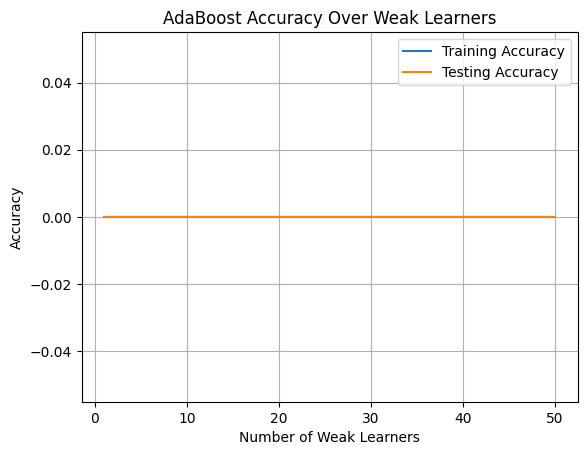

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Step 1: 加权弱线性分类器类 ---
class WeightedWeakLinearClassifier:
    def __init__(self):
        self.mean_minus_1 = None
        self.mean_plus_1 = None
        self.direction = None

    def fit(self, X, y, weights):
        # 分开两类数据
        class_minus_1 = (y == -1)
        class_plus_1 = (y == 1)

        # 计算加权均值
        self.mean_minus_1 = np.average(X[class_minus_1], axis=0, weights=weights[class_minus_1])
        self.mean_plus_1 = np.average(X[class_plus_1], axis=0, weights=weights[class_plus_1])

        # 分类方向向量
        self.direction = self.mean_plus_1 - self.mean_minus_1

        # 防止方向向量太小，加入扰动
        if np.linalg.norm(self.direction) < 1e-5:
            self.direction += np.random.uniform(-0.1, 0.1, size=self.direction.shape)

        # 调试信息
        print(f"[Weak Learner] Class -1 Mean: {self.mean_minus_1}, Class +1 Mean: {self.mean_plus_1}")
        print(f"[Weak Learner] Direction Vector: {self.direction}")

    def predict(self, X):
        # 计算每个点到分类方向的投影
        projections = np.dot(X - self.mean_minus_1, self.direction)
        return np.sign(projections)

# --- Step 2: AdaBoost实现 ---
class AdaBoost:
    def __init__(self, n_learners):
        self.n_learners = n_learners
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples  # 初始化权重

        for i in range(self.n_learners):
            learner = WeightedWeakLinearClassifier()
            learner.fit(X, y, weights)

            predictions = learner.predict(X)
            error = np.sum(weights * (predictions != y))  # 计算错误率

            # 检查错误率是否过高
            if error >= 0.5:
                print(f"[AdaBoost] Weak Learner {i + 1} skipped due to high error rate: {error:.4f}")
                continue

            # 计算弱学习器的权重
            learner_weight = 0.5 * np.log((1 - error) / (error + 1e-10))  # 防止除零
            self.learners.append(learner)
            self.learner_weights.append(learner_weight)

            # 更新数据点权重
            weights *= np.exp(-learner_weight * y * predictions)
            weights /= np.sum(weights)  # 归一化

            # 调试信息
            print(f"[AdaBoost] Weak Learner {i + 1}: Error Rate -> {error:.4f}, Weight -> {learner_weight:.4f}")
            print(f"[AdaBoost] Updated Weights: {weights[:5]} (first 5)")

    def predict(self, X):
        # 加权投票：所有弱学习器的预测值加权求和
        final_predictions = np.zeros(X.shape[0])
        for learner, weight in zip(self.learners, self.learner_weights):
            final_predictions += weight * learner.predict(X)
        return np.sign(final_predictions)

# --- Step 3: 数据加载 ---
train_data = np.loadtxt("adaboost-train-24.txt")
test_data = np.loadtxt("adaboost-test-24.txt")

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# --- Step 4: 数据检查 ---
print("[Data Check] Training Data Sample:")
print(X_train[:5], y_train[:5])
print("[Data Check] Training Labels Distribution:", np.unique(y_train, return_counts=True))
print("[Data Check] Testing Labels Distribution:", np.unique(y_test, return_counts=True))

# --- Step 5: AdaBoost训练 ---
n_learners = 50  # 可根据需要调整
model = AdaBoost(n_learners=n_learners)
model.fit(X_train, y_train)

# --- Step 6: 准确率计算 ---
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)

print(f"[Results] Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"[Results] Testing Accuracy: {test_accuracy * 100:.2f}%")

# --- Step 7: 准确率随弱学习器数量的变化 ---
train_accuracies = []
test_accuracies = []

for n in range(1, n_learners + 1):
    sub_model = AdaBoost(n_learners=n)
    sub_model.fit(X_train, y_train)

    train_accuracies.append(np.mean(sub_model.predict(X_train) == y_train))
    test_accuracies.append(np.mean(sub_model.predict(X_test) == y_test))

plt.plot(range(1, n_learners + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, n_learners + 1), test_accuracies, label="Testing Accuracy")
plt.xlabel("Number of Weak Learners")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy Over Weak Learners")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# --- 数据加载 ---
# 加载提供的训练数据和测试数据
train_data = np.loadtxt("adaboost-train-24.txt")
test_data = np.loadtxt("adaboost-test-24.txt")

X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# --- 用调库实现 AdaBoost ---
# 使用决策树（深度为1）作为弱学习器
weak_learner = DecisionTreeClassifier(max_depth=1)

# 创建 AdaBoost 模型
n_estimators = 50  # 弱学习器的数量
model = AdaBoostClassifier(estimator=weak_learner, n_estimators=n_estimators, algorithm="SAMME")

# 训练模型
model.fit(X_train, y_train)

# --- 测试性能 ---
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"[调库] 训练集准确率: {train_accuracy * 100:.2f}%")
print(f"[调库] 测试集准确率: {test_accuracy * 100:.2f}%")

# --- 准确率曲线 ---
train_accuracies = []
test_accuracies = []

for i, pred in enumerate(model.staged_predict(X_train)):
    train_accuracies.append(accuracy_score(y_train, pred))

for i, pred in enumerate(model.staged_predict(X_test)):
    test_accuracies.append(accuracy_score(y_test, pred))

# --- 绘图 ---
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label="Testing Accuracy")
plt.xlabel("Number of Weak Learners")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy Curve (Using sklearn)")
plt.legend()
plt.grid()
plt.show()

# --- 可视化决策边界 ---
# 为了可视化，我们需要降维到2D（确保数据本身是二维的）
if X_train.shape[1] == 2:
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.RdBu)
    plt.title("Decision Boundary (Training Data)")
    plt.show()
else:
    print("[可视化] 数据维度不是2D，无法绘制决策边界。")


TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'